In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import t, beta, lognorm, expon, gamma, uniform, cauchy
from scipy.stats import gaussian_kde, poisson, binom, norm, chi2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from scipy.linalg import inv, sqrtm

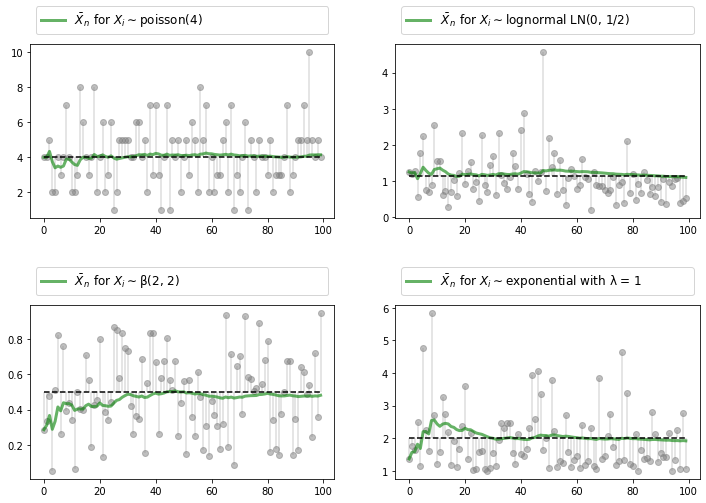

In [21]:

n = 100

# Arbitrary collection of distributions
distributions = {"β(2, 2)": beta(2, 2),
                 "lognormal LN(0, 1/2)": lognorm(0.5),
                 "γ(5, 1/2)": gamma(5, scale=2),
                 "poisson(4)": poisson(4),
                 "exponential with λ = 1": expon(1)}

                 
# Create a figure and some axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Set some plotting parameters to improve layout
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 2,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}
plt.subplots_adjust(hspace=0.5)
for ax in axes:
    # Choose a randomly selected distribution
    name = random.choice(list(distributions.keys()))
    distribution = distributions.pop(name)

    # Generate n draws from the distribution
    data = distribution.rvs(n)

    # Compute sample mean at each n
    sample_mean = np.empty(n)
    for i in range(n):
        sample_mean[i] = np.mean(data[:i+1])

    # Plot
    ax.plot(list(range(n)), data, 'o', color='grey', alpha=0.5)
    axlabel = '$\\bar X_n$ for $X_i \sim$' + name
    ax.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6, label=axlabel)
    m = distribution.mean()
    ax.plot(list(range(n)), [m] * n, 'k--', lw=1.5)
    ax.vlines(list(range(n)), m, data, lw=0.2)
    ax.legend(**legend_args, fontsize=12)

plt.savefig('lln.pdf')

In [23]:
beta_dist = beta(2, 2)

def gen_x_draws(k):
    """
    Returns a flat array containing k independent draws from the
    distribution of X, the underlying random variable.  This distribution
    is itself a convex combination of three beta distributions.
    """
    bdraws = beta_dist.rvs((3, k))
    # Transform rows, so each represents a different distribution
    bdraws[0, :] -= 0.5
    bdraws[1, :] += 0.6
    bdraws[2, :] -= 1.1
    # Set X[i] = bdraws[j, i], where j is a random draw from {0, 1, 2}
    js = np.random.randint(0, 2, size=k)
    X = bdraws[js, np.arange(k)]
    # Rescale, so that the random variable is zero mean
    m, sigma = X.mean(), X.std()
    return (X - m) / sigma

nmax = 5
reps = 100000
ns = list(range(1, nmax + 1))



In [24]:
# Form a matrix Z such that each column is reps independent draws of X
Z = np.empty((reps, nmax))
for i in range(nmax):
    Z[:, i] = gen_x_draws(reps)
# Take cumulative sum across columns
S = Z.cumsum(axis=1)
# Multiply j-th column by sqrt j
Y = (1 / np.sqrt(ns)) * S



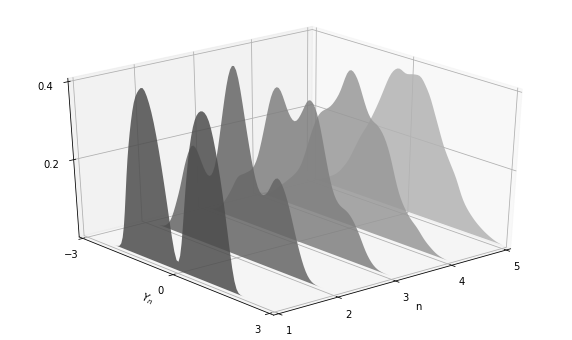

In [55]:
# Plot
fig = plt.figure(figsize = (10, 6))
ax = fig.gca(projection='3d')

a, b = -3, 3
gs = 100
xs = np.linspace(a, b, gs)

# Build verts
greys = np.linspace(0.3, 0.7, nmax)
verts = []
for n in ns:
    density = gaussian_kde(Y[:, n-1])
    ys = density(xs)
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[str(g) for g in greys])
poly.set_alpha(0.85)
ax.add_collection3d(poly, zs=ns, zdir='x')

ax.set(xlim3d=(1, nmax), xticks=(ns), ylabel='$Y_n$',
       xlabel=("n"), yticks=((-3, 0, 3)), ylim3d=(a, b),
       zlim3d=(0, 0.4), zticks=((0.2, 0.4)))
ax.invert_xaxis()
# Rotates the plot 30 deg on z axis and 45 deg on x axis
ax.view_init(30, 50)
plt.savefig('clt0.pdf')

hver element i plot n er gjennomsnitt av av n realiseringer